<a href="https://colab.research.google.com/github/ftkbyond77/Image-Generative/blob/main/Text_to_Images1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datath/datasetX3_reverse.pt


# Latent Diffusion Model (LDM)

In [ ]:
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("CompVis/ldm-text2im-large-256")

2025-04-20 17:03:06.400207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745168586.611213      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745168586.669694      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/522 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/713 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-text2im-large-256/snapshots/30de525ca11a880baea4962827fb6cb0bb268955/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-text2im-large-256/snapshots/30de525ca11a880baea4962827fb6cb0bb268955/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-text2im-large-256/snapshots/30de525ca11a880baea4962827fb6cb0bb268955/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-text2im-large-256/snapshots/30de525ca11a880baea4962827fb6cb0bb268955/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'timestep_values': None} were passed to DDIMScheduler, but are not 

In [ ]:
prompt = "John cena"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

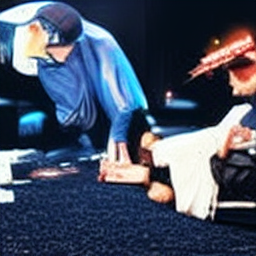

In [ ]:
image

# Kandinsky 2.1

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-1", torch_dtype=torch.float16)
pipe.enable_model_cpu_offload()

prompt = "A alien cheeseburger creature eating itself, claymation, cinematic, moody lighting"
negative_prompt = "low quality, bad quality"

image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale =1.0, height=768, width=768).images[0]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type xlm-roberta to instantiate a model of type M-CLIP. This is not supported for all configurations of models and can yield errors.


model_index.json:   0%|          | 0.00/500 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.09G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/495M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/767 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
prompt = "Enrico Pucci from JoJo's Bizarre Adventure summoning his Stand Made in Heaven, dramatic pose, Made in Heaven appearing behind him, intense atmosphere, glowing energy effects, anime style, detailed line art, highly dynamic composition, cosmic background, beams of light, speed lines, powerful expression, JoJo anime aesthetic,"
negative_prompt = "low quality, bad anatomy, extra limbs, off-style, blurry, western cartoon style, distorted face, wrong character"
# image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=224, width=224).images[0]

In [ ]:
import random
import time

In [ ]:
images = []
base_seed = int(time.time())

In [ ]:
for i in range(5):
    # Create a unique seed combining the base seed and iteration
    current_seed = base_seed + i * 1000 + random.randint(1, 999)

    # Generate the image with the unique seed
    result = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        prior_guidance_scale=1.0,
        height=224,
        width=224,
        generator=torch.Generator().manual_seed(current_seed)
    )
    images.append(result.images[0])
    print(f"Generated image {i+1}/5 with seed {current_seed}")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Generated image 1/5 with seed 1745171488


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Generated image 2/5 with seed 1745172469


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Generated image 3/5 with seed 1745174196


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Generated image 4/5 with seed 1745175340


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Generated image 5/5 with seed 1745175861


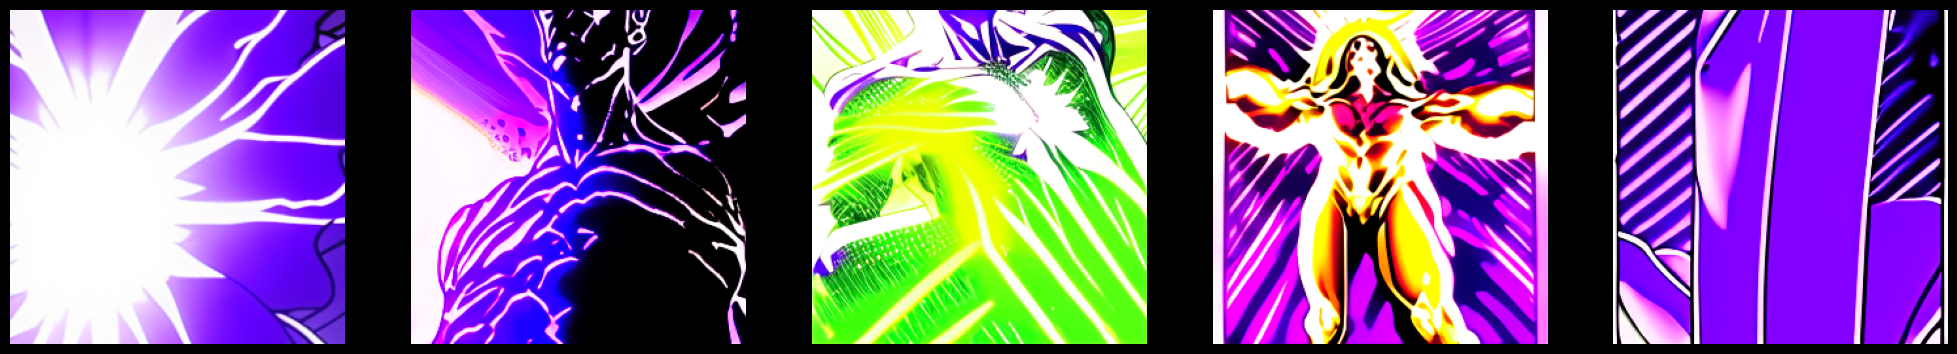

In [ ]:
plt.style.use('dark_background')
fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 5, 5))
fig.patch.set_facecolor('black')

for i, (img, ax) in enumerate(zip(images, axes)):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
prompt = "Anime style, Father Pucci from JoJo’s Bizarre Adventure standing with arms wide open, head tilted back, absorbing divine energy from the sky, glowing light beams shining down on him, dramatic lighting, flowing robes, intense expression, holy atmosphere, celestial background, powerful and ethereal vibe"
negative_prompt = "low quality, bad anatomy, extra limbs, off-style, blurry, western cartoon style, distorted face, wrong character"
image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=224, width=224).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

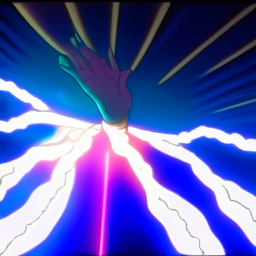

In [ ]:
image

In [ ]:
prompt = "Anime style, Father Pucci from JoJo’s Bizarre Adventure standing with arms wide open, head tilted back, absorbing divine energy from the sky, glowing light beams shining down on him, dramatic lighting, flowing robes, intense expression, holy atmosphere, celestial background, powerful and ethereal vibe, 8k"

# Anything V5 / V4 (Anime + Realistic Hybrid)

In [ ]:
pipe = DiffusionPipeline.from_pretrained("genai-archive/anything-v5")

model_index.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/764 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

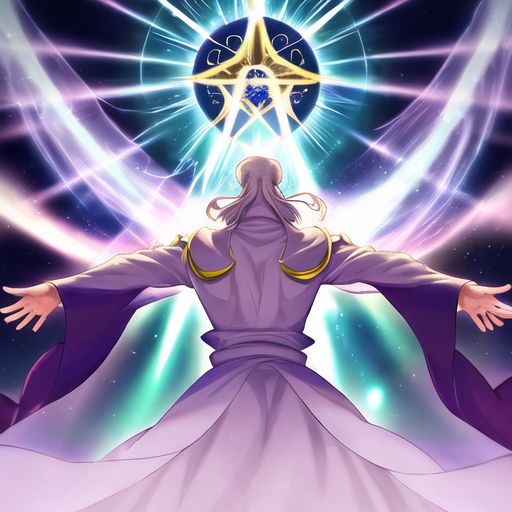

In [ ]:
image

In [ ]:
prompt = "Enrico Pucci from JoJo's Bizarre Adventure summoning his Stand Made in Heaven, dramatic pose, Made in Heaven appearing behind him, intense atmosphere, glowing energy effects, anime style, detailed line art, highly dynamic composition, cosmic background, beams of light, speed lines, powerful expression, JoJo anime aesthetic, 8k,"

In [ ]:
images = []

In [ ]:
for i in range(5):
    current_seed = base_seed + i * 1000 + random.randint(1, 999)
    result = pipe(
        prompt=prompt,
        height=400,
        width=400,
        generator=torch.Generator().manual_seed(current_seed)
    )
    images.append(result.images[0])
    print(f"Generated image {i+1}/5 with seed {current_seed}")

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Generated image 1/5 with seed 1745172102


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 2/5 with seed 1745172657


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 3/5 with seed 1745174254


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 4/5 with seed 1745174826


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 5/5 with seed 1745175854


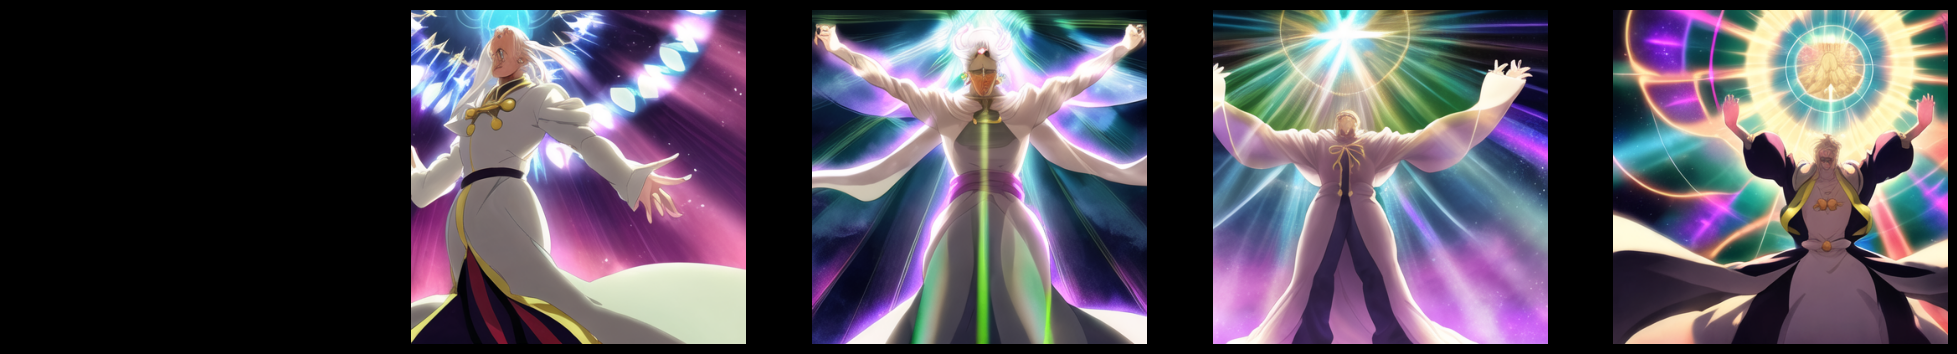

In [ ]:
plt.style.use('dark_background')
fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 5, 5))
fig.patch.set_facecolor('black')

for i, (img, ax) in enumerate(zip(images, axes)):
    ax.imshow(img)
    ax.axis('off')
plt.show()